<a href="https://colab.research.google.com/github/disakuz/Python_netbooks/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%BA%D0%BE%D0%BD%D0%B2%D0%B5%D1%80%D1%81%D0%B8%D0%B9_%D0%BA%D0%B0%D1%80%D1%82%D0%BE%D1%87%D0%B5%D0%BA_%D1%82%D0%BE%D0%B2%D0%B0%D1%80%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib as plt

Данные выгружаются из личного кабинета ОЗОН, ОЗОН дает возможность выгрузить данные с разбивкой по дням не более чем за 2 недели
Выбран период наблюдений с 29.05 по 12.06

https://docs.google.com/spreadsheets/d/16y_Ux9fxFB7ln4bXfeEso_AenbeB0snS/edit?usp=sharing&ouid=105740097100282595367&rtpof=true&sd=true

In [ ]:
!gdown --id  1GMYgvmtbU-816Zk3xyNphYzd4W12qu9a

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1GMYgvmtbU-816Zk3xyNphYzd4W12qu9a
To: /content/analytics_report_2023-06-17_29_32.xlsx
100% 27.6M/27.6M [00:01<00:00, 26.0MB/s]


In [ ]:
df = pd.read_excel('/content/analytics_report_2023-06-17_29_32.xlsx')

In [ ]:
df.head()

,Товары,Модель,Ozon ID,Артикул,День,Показы в поиске и каталоге,Показы на карточке товара,В корзину из карточки товара,Заказано товаров,Заказано на сумму
0,Жидкость гидроусилителя руля желтая FEBI 08972 1л,Жидкость гидроусилителя руля желтая FEBI 08972 1л,266453179,FEBI08972,2023-05-29,16,3,0,0,0
1,Жидкость гидроусилителя руля желтая FEBI 08972 1л,Жидкость гидроусилителя руля желтая FEBI 08972 1л,266453179,FEBI08972,2023-05-30,25,2,0,0,0
2,Жидкость гидроусилителя руля желтая FEBI 08972 1л,Жидкость гидроусилителя руля желтая FEBI 08972 1л,266453179,FEBI08972,2023-05-31,13,2,0,0,0
3,Жидкость гидроусилителя руля желтая FEBI 08972 1л,Жидкость гидроусилителя руля желтая FEBI 08972 1л,266453179,FEBI08972,2023-06-01,15,1,0,0,0
4,Жидкость гидроусилителя руля желтая FEBI 08972 1л,Жидкость гидроусилителя руля желтая FEBI 08972 1л,266453179,FEBI08972,2023-06-02,14,1,0,0,0


##Предобработка данных

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741780 entries, 0 to 741779
Data columns (total 10 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Товары                        741780 non-null  object
 1   Модель                        739871 non-null  object
 2   Ozon ID                       741780 non-null  int64 
 3   Артикул                       741780 non-null  object
 4   День                          741780 non-null  object
 5   Показы в поиске и каталоге    741780 non-null  int64 
 6   Показы на карточке товара     741780 non-null  int64 
 7   В корзину из карточки товара  741780 non-null  int64 
 8   Заказано товаров              741780 non-null  int64 
 9   Заказано на сумму             741780 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 56.6+ MB


In [ ]:
df.columns

Index(['Товары', 'Модель', 'Ozon ID', 'Артикул', 'День',
       'Показы в поиске и каталоге', 'Показы на карточке товара',
       'В корзину из карточки товара', 'Заказано товаров',
       'Заказано на сумму'],
      dtype='object')

In [ ]:
df.columns = ['Products', 'Model', 'Ozon ID', 'Article', 'Day',
       'Impressions in search and catalog', 'Impressions on the product card',
       'Add to cart from item card', 'Ordered items',
       'Ordered for the amount']

In [ ]:
df.columns = df.columns.str.replace(' ','_').str.lower()

In [ ]:
df.head()

,products,model,ozon_id,article,day,impressions_in_search_and_catalog,impressions_on_the_product_card,add_to_cart_from_item_card,ordered_items,ordered_for_the_amount
0,Жидкость гидроусилителя руля желтая FEBI 08972 1л,Жидкость гидроусилителя руля желтая FEBI 08972 1л,266453179,FEBI08972,2023-05-29,16,3,0,0,0
1,Жидкость гидроусилителя руля желтая FEBI 08972 1л,Жидкость гидроусилителя руля желтая FEBI 08972 1л,266453179,FEBI08972,2023-05-30,25,2,0,0,0
2,Жидкость гидроусилителя руля желтая FEBI 08972 1л,Жидкость гидроусилителя руля желтая FEBI 08972 1л,266453179,FEBI08972,2023-05-31,13,2,0,0,0
3,Жидкость гидроусилителя руля желтая FEBI 08972 1л,Жидкость гидроусилителя руля желтая FEBI 08972 1л,266453179,FEBI08972,2023-06-01,15,1,0,0,0
4,Жидкость гидроусилителя руля желтая FEBI 08972 1л,Жидкость гидроусилителя руля желтая FEBI 08972 1л,266453179,FEBI08972,2023-06-02,14,1,0,0,0


In [ ]:
df['day'] = pd.to_datetime(df['day'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741780 entries, 0 to 741779
Data columns (total 10 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   products                           741780 non-null  object        
 1   model                              739871 non-null  object        
 2   ozon_id                            741780 non-null  int64         
 3   article                            741780 non-null  object        
 4   day                                741780 non-null  datetime64[ns]
 5   impressions_in_search_and_catalog  741780 non-null  int64         
 6   impressions_on_the_product_card    741780 non-null  int64         
 7   add_to_cart_from_item_card         741780 non-null  int64         
 8   ordered_items                      741780 non-null  int64         
 9   ordered_for_the_amount             741780 non-null  int64         
dtypes: datetime64[ns](1)

In [ ]:
df.isna().mean()

products                             0.000000
model                                0.002574
ozon_id                              0.000000
article                              0.000000
day                                  0.000000
impressions_in_search_and_catalog    0.000000
impressions_on_the_product_card      0.000000
add_to_cart_from_item_card           0.000000
ordered_items                        0.000000
ordered_for_the_amount               0.000000
dtype: float64

In [ ]:
df['day'] = df['day'].dt.date

In [ ]:
df.head()

,products,model,ozon_id,article,day,impressions_in_search_and_catalog,impressions_on_the_product_card,add_to_cart_from_item_card,ordered_items,ordered_for_the_amount
0,Жидкость гидроусилителя руля желтая FEBI 08972 1л,Жидкость гидроусилителя руля желтая FEBI 08972 1л,266453179,FEBI08972,2023-05-29,16,3,0,0,0
1,Жидкость гидроусилителя руля желтая FEBI 08972 1л,Жидкость гидроусилителя руля желтая FEBI 08972 1л,266453179,FEBI08972,2023-05-30,25,2,0,0,0
2,Жидкость гидроусилителя руля желтая FEBI 08972 1л,Жидкость гидроусилителя руля желтая FEBI 08972 1л,266453179,FEBI08972,2023-05-31,13,2,0,0,0
3,Жидкость гидроусилителя руля желтая FEBI 08972 1л,Жидкость гидроусилителя руля желтая FEBI 08972 1л,266453179,FEBI08972,2023-06-01,15,1,0,0,0
4,Жидкость гидроусилителя руля желтая FEBI 08972 1л,Жидкость гидроусилителя руля желтая FEBI 08972 1л,266453179,FEBI08972,2023-06-02,14,1,0,0,0


##Анализ данных

20 наиболее прибыльных позиций

In [ ]:
df.groupby('model')[['impressions_in_search_and_catalog','impressions_on_the_product_card','ordered_items','ordered_for_the_amount',]].sum().sort_values('ordered_for_the_amount',ascending=False).head(20)

,impressions_in_search_and_catalog,impressions_on_the_product_card,ordered_items,ordered_for_the_amount
model,,,,
Мочевина (ADBLUE) 10 л Mercedes A004989042014,875,218,12,57168
"Глушитель для автомобилей Kia Sportage (10-) 2.0i осн. (алюминизированная сталь), EMM 0358",224,129,6,40260
"Комплект сцепления, CH11-256",236,89,6,31506
Электровентилятор охлаждения для автомобилей XC90 (02-) (с кожухом) LFK1057,13,2,1,30930
"Радиатор охлаждения для автомобилей МАЗ 4370 ""Зубренок"" Deutz/Cummins ISF3.8/Д-245 Е3 LRC12371",103,33,1,30920
"Комплект цепи ГРМ Masuma EP6, MGR-9025",391,110,4,26948
Диск тормозной задний 3060-040 для: Citroen-Peugeot,257,54,4,23480
"комплект цепи грм, qf13a00098 аналог vag 03c198229c",20,17,1,22740
"Комплект сцепления в сборе для автомобилей Hyundai Solaris (10-)/(17-) 1.6i 6MT с муфтой, FR 0820",215,21,2,22620


ТОП - 20 категорий по количеству заказов

In [ ]:
df.groupby('model')['ordered_items'].sum().sort_values(ascending = False).reset_index().head(20)

,model,ordered_items
0,"Болт колесный 1 шт для Mercedes CL (216), CLS ...",32
1,"Гайка пластмассовая аналог VAG WHT000713, P37-...",20
2,"Головка шестигранная 7 мм 1/4"", 600057",20
3,Масляный фильтр ХЕНДАЙ (HYUNDAI) 2630035504 / ...,18
4,Держатель пластмассовый P37-0434,15
5,"Сверло по металлу левого вращения 3.0мм, 212030",14
6,Мочевина (ADBLUE) 10 л Mercedes A004989042014,12
7,"Лампа PY21/5W 12v21/5w (BAY15d) желтая 1 шт., ...",11
8,Клипса автомобильная Tatsumi артикул TJB1175,10
9,Клипса автомобильная Tatsumi артикул TJB1184,10


ТОП - 20 по появлению в поиске товаров

In [ ]:
df.groupby(['model','article'])['impressions_in_search_and_catalog'].sum().sort_values(ascending = False).reset_index().head(20)

,model,article,impressions_in_search_and_catalog
0,Комплект направляющей гильзы Zekkert BR-1426,ZEKKERTBR1426,9428
1,Комплект направляющей гильзы Zekkert BR-1452,ZEKKERTBR1452,5345
2,накладка педали сцепления и тормоза аналог o.e...,KINGMB010183GX90,5153
3,"Лампа Masuma W5W (W2.1x9.5d, T10) 12V 5W, L510",MASUMAL510,3405
4,Крышка маслозаливной горловины для Opel Astra ...,ZEKKERTBD2031,3034
5,уплотнительное кольцо для резьбовой пробки мас...,BLUEPRINTADA100105,2611
6,Датчик абсолютного давления для автомобилей ГА...,STARTVOLTVSMP0341,2446
7,Ремень клиновой TFA1058,TATSUMITFA1058,2404
8,"Сайлентблок рычага подвески для JAGUAR 827601,...",SIDEM827601,2403
9,Резинка стеклоочистителя 350мм TFL1035,TATSUMITFL1035,2398


Топ - 20 по просмотрам в карточке

In [ ]:
df.groupby(['model','article'])['impressions_on_the_product_card'].sum().sort_values(ascending = False).reset_index().head(20)

,model,article,impressions_on_the_product_card
0,Глушитель для автомобилей Renault Logan (04-) ...,TRIALLIEAM0901,403
1,Глушитель для автомобилей Лада Vesta (19-) доп...,TRIALLIEAM0140,350
2,Регулятор напряжения генератора для автомобиле...,STARTVOLTVRR0804,267
3,Фильтр топливный тонкой очистки для автомобиле...,STARTVOLTVSFF1070,253
4,"ШРУС наружный для автомобилей X-Ray (15-), GO 843",TRIALLIGO843,238
5,Комплект направляющей гильзы Zekkert BR-1426,ZEKKERTBR1426,234
6,Ремень поликлиновой Miles 4PK725,TRIALLI4PK725,226
7,"Набор для развальцовки тормозных трубок, 7 пре...",DELOTEKHNIKI820307,224
8,Мочевина (ADBLUE) 10 л Mercedes A004989042014,MERCEDESBENZA004989042012,218
9,Набор для развальцовки тормозных трубок профес...,DELOTEKHNIKI820314,201


In [ ]:

df.groupby(['model','article'])['ordered_items'].sum().sort_values(ascending = False).reset_index().head(20)

,model,article,ordered_items
0,"Болт колесный 1 шт для Mercedes CL (216), CLS ...",STELLOX7901914SX,32
1,"Гайка пластмассовая аналог VAG WHT000713, P37-...",PATRONP371450,20
2,"Головка шестигранная 7 мм 1/4"", 600057",DELOTEKHNIKI600057,20
3,Масляный фильтр ХЕНДАЙ (HYUNDAI) 2630035504 / ...,HYUNDAIKIA263003550501,18
4,Держатель пластмассовый P37-0434,PATRONP370434,15
5,"Сверло по металлу левого вращения 3.0мм, 212030",DELOTEKHNIKI212030,14
6,Мочевина (ADBLUE) 10 л Mercedes A004989042014,MERCEDESBENZA004989042012,12
7,"Лампа PY21/5W 12v21/5w (BAY15d) желтая 1 шт., ...",GANZGIP06037,10
8,Клипса автомобильная Tatsumi артикул TJB1175,TATSUMITJB1175,10
9,"Клипса пластиковая Masuma, KJ-1463",MASUMAKJ1463,10


<Axes: xlabel='ordered_items', ylabel='Count'>

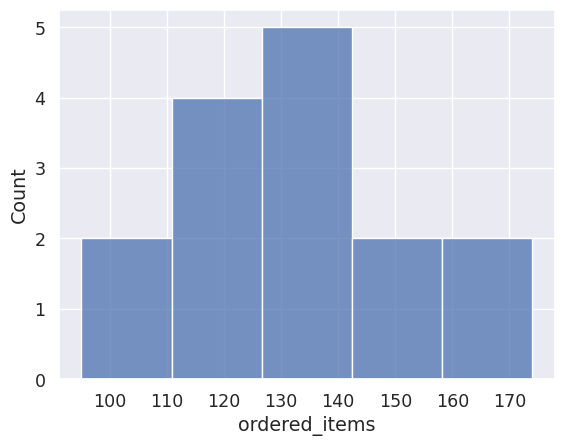

In [ ]:
sns.histplot(df.groupby('day')['ordered_items'].sum())

<Axes: >

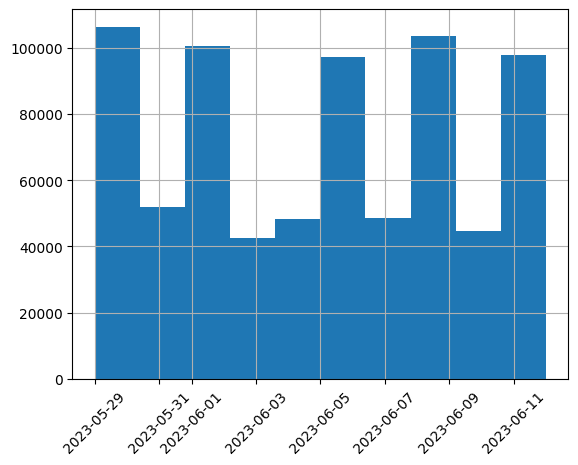

In [ ]:
df['day'].hist(xrot = 45)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Everyday search in catolog')

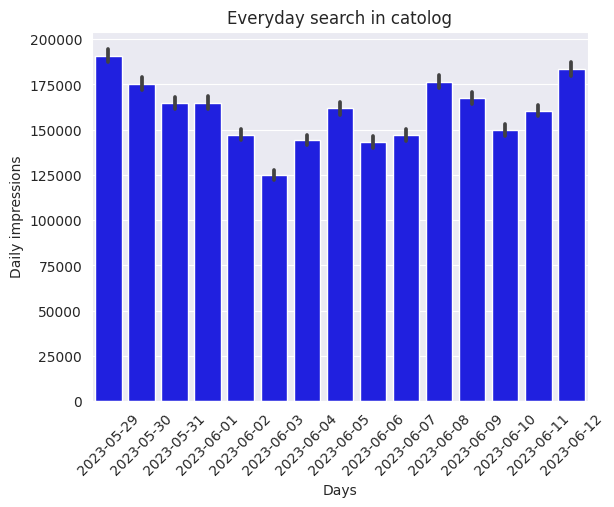

In [ ]:
sns.set_style("darkgrid")
sns.barplot(data=df, x="day", y="impressions_in_search_and_catalog", color = 'blue', estimator=np.sum)
plt.xticks(rotation=45)
plt.xlabel('Days')
plt.ylabel('Daily impressions')
plt.title('Everyday search in catolog')

Text(0.5, 1.0, 'Everyday orderung')

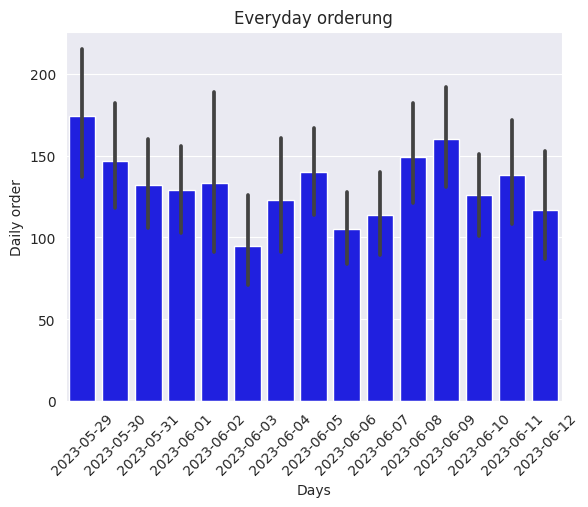

In [ ]:
sns.set_style("darkgrid")
sns.barplot(data=df, x="day", y="ordered_items",color = 'blue', estimator=np.sum)
plt.xticks(rotation=45)
plt.xlabel('Days')
plt.ylabel('Daily order')
plt.title('Everyday orderung')

Text(0.5, 1.0, 'Everyday impressions search and catalog')

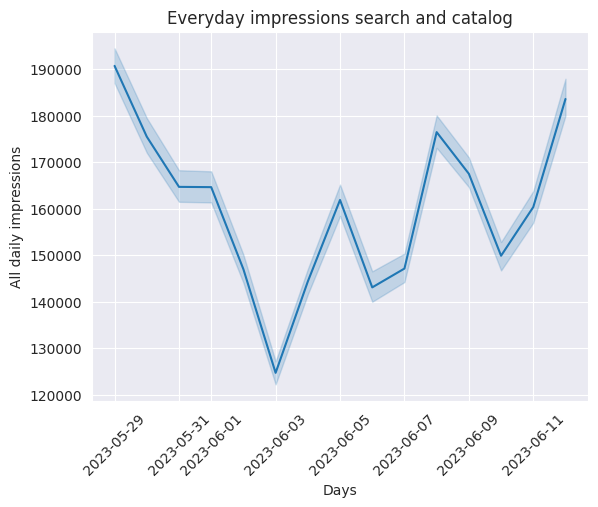

In [ ]:
sns.lineplot(data=df, x="day", y="impressions_in_search_and_catalog", estimator = "sum")
plt.xticks(rotation=45)
plt.xlabel('Days')
plt.ylabel('All daily impressions')
plt.title('Everyday impressions search and catalog')

Text(0.5, 1.0, 'Everyday impressions on the card')

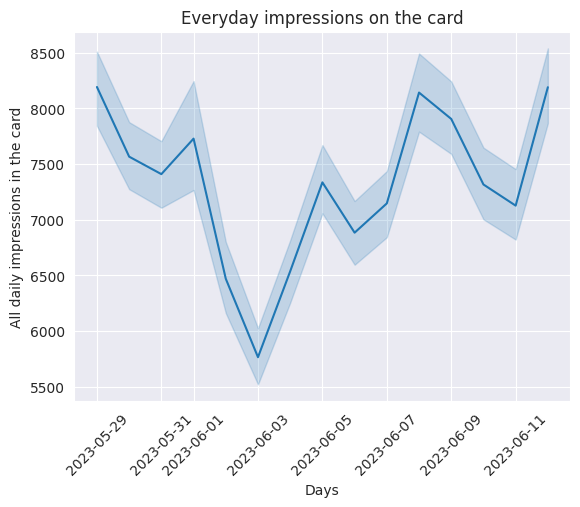

In [ ]:
sns.lineplot(data=df, x="day", y="impressions_on_the_product_card", estimator = "sum")
plt.xticks(rotation=45)
plt.xlabel('Days')
plt.ylabel('All daily impressions in the card')
plt.title('Everyday impressions on the card')

Text(0.5, 1.0, 'Daily orderung ')

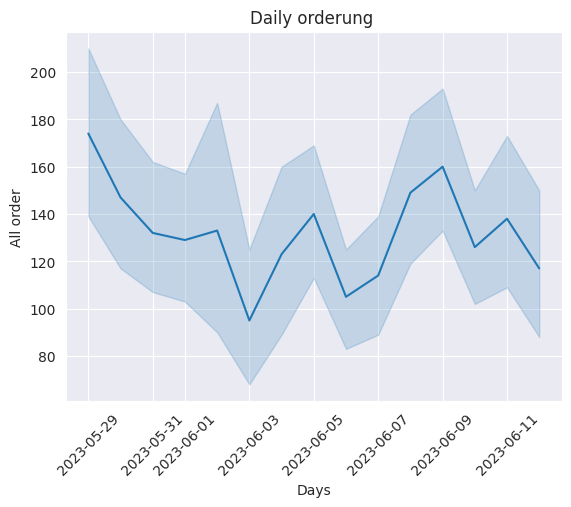

In [ ]:
sns.lineplot(data=df, x="day", y="ordered_items", estimator = "sum")
plt.xticks(rotation=45)
plt.xlabel('Days')
plt.ylabel('All order')
plt.title('Daily orderung ')

ТОП 100

In [ ]:
df_top = df[['model','article', 'ordered_items','ordered_for_the_amount']]

In [ ]:
df_top.sort_values('ordered_items', ascending = False).head(100)

,model,article,ordered_items,ordered_for_the_amount
142704,"Болт колесный 1 шт для Mercedes CL (216), CLS ...",STELLOX7901914SX,20,8000
428559,"Клипса пластиковая Masuma, KJ-1463",MASUMAKJ1463,10,1000
475400,Клипса автомобильная Tatsumi артикул TJB1175,TATSUMITJB1175,10,900
475464,Клипса автомобильная Tatsumi артикул TJB1184,TATSUMITJB1184,10,900
85040,"Гайка пластмассовая аналог VAG WHT000713, P37-...",PATRONP371450,10,900
...,...,...,...,...
343036,проставка пружины нижняя аналог o.e. 48158-47010,KINGMB01TSI120,2,1480
436272,Кольцо уплотнительное глушителя Masuma 42х55 у...,MASUMAMOS108,2,390
149202,втулка направляющая суппорта тормозного заднег...,KINGMB010174ZRE151RKIT,2,1406
505042,Компрессометр для бензиновых двигателей с наса...,DELOTEKHNIKI830108,2,4254


In [ ]:
df_top = df.sort_values('ordered_items', ascending = False).iloc[:100]

In [ ]:
df_top_100 = df.sort_values('ordered_items', ascending = False).iloc[:100]

In [ ]:
df_top_100.head()

,products,model,ozon_id,article,day,impressions_in_search_and_catalog,impressions_on_the_product_card,add_to_cart_from_item_card,ordered_items,ordered_for_the_amount
142704,"Болт колесный 1 шт для Mercedes CL (216), CLS ...","Болт колесный 1 шт для Mercedes CL (216), CLS ...",600991634,STELLOX7901914SX,2023-06-02,13,3,1,20,8000
428559,"Клипса пластиковая Masuma, KJ-1463","Клипса пластиковая Masuma, KJ-1463",748074398,MASUMAKJ1463,2023-06-02,2,0,0,10,1000
475400,Клипса автомобильная Tatsumi артикул TJB1175,Клипса автомобильная Tatsumi артикул TJB1175,768001904,TATSUMITJB1175,2023-06-12,7,2,4,10,900
475464,Клипса автомобильная Tatsumi артикул TJB1184,Клипса автомобильная Tatsumi артикул TJB1184,768001921,TATSUMITJB1184,2023-06-04,2,3,0,10,900
85040,"Гайка пластмассовая аналог VAG WHT000713, P37-...","Гайка пластмассовая аналог VAG WHT000713, P37-...",567306444,PATRONP371450,2023-05-29,30,7,2,10,900


In [ ]:
df_top_100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 142704 to 525417
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   products                           100 non-null    object
 1   model                              99 non-null     object
 2   ozon_id                            100 non-null    int64 
 3   article                            100 non-null    object
 4   day                                100 non-null    object
 5   impressions_in_search_and_catalog  100 non-null    int64 
 6   impressions_on_the_product_card    100 non-null    int64 
 7   add_to_cart_from_item_card         100 non-null    int64 
 8   ordered_items                      100 non-null    int64 
 9   ordered_for_the_amount             100 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 8.6+ KB


In [ ]:
df_top_100.isna().mean()

products                             0.00
model                                0.01
ozon_id                              0.00
article                              0.00
day                                  0.00
impressions_in_search_and_catalog    0.00
impressions_on_the_product_card      0.00
add_to_cart_from_item_card           0.00
ordered_items                        0.00
ordered_for_the_amount               0.00
dtype: float64

In [ ]:
df_top_100['convers_to_card'].replace([np.inf, -np.inf], np.nan, inplace=True)
df_top_100['convers_to_card'].fillna(0, inplace=True)
df_top_100['convers_to_add'].replace([np.inf, -np.inf], np.nan, inplace=True)
df_top_100['convers_to_add'].fillna(0, inplace=True)

KeyError: ignored

In [ ]:
df_top_100.head()

###Конверсии

Конверсия из поиска в просмотр карточки товара всего

In [ ]:
df['convers_to_card'] = df['impressions_on_the_product_card']/df['impressions_in_search_and_catalog']

Text(0.5, 1.0, 'Converssion search to card')

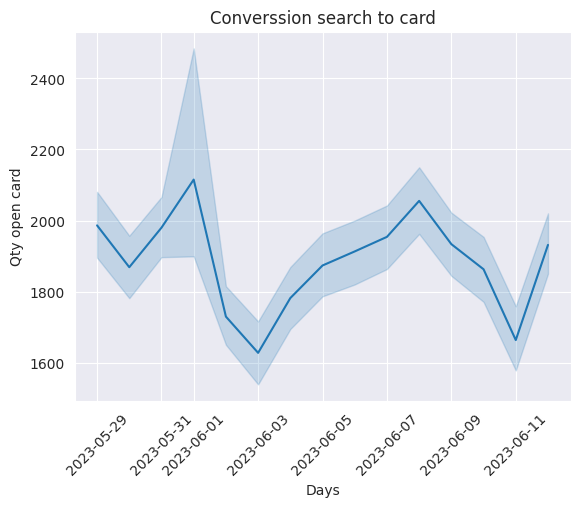

In [ ]:
sns.lineplot(data=df, x="day", y='convers_to_card', estimator = "sum")
plt.xticks(rotation=45)
plt.xlabel('Days')
plt.ylabel('Qty open card')
plt.title('Converssion search to card')

<Axes: >

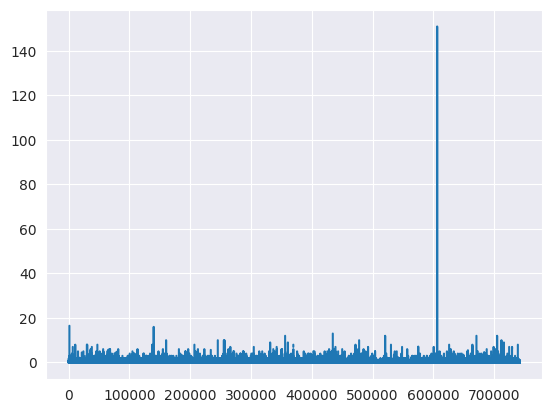

In [ ]:
df['convers_to_card'].plot()

Конверсия из просмотра в карточку ТОП-100

In [ ]:
sns.lineplot(data=df_top_100, x="day", y='convers_to_card', estimator = "sum")
plt.xticks(rotation=45)
plt.xlabel('Days')
plt.ylabel('Qty open card')
plt.title('Converssion search to card top 100')

ValueError: ignored

In [ ]:
df_top_100['convers_to_card'].hist()

Конверсия из просмотра карточки в добавление в корзину

In [ ]:
df['convers_to_add'] = df['add_to_cart_from_item_card']/df['impressions_on_the_product_card']

Text(0.5, 1.0, 'Converssion card to add')

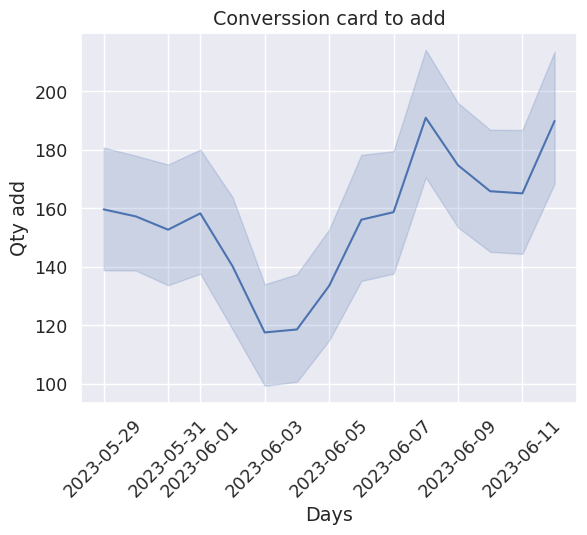

In [ ]:
sns.lineplot(data=df, x="day", y='convers_to_add', estimator = "sum")
plt.xticks(rotation=45)
plt.xlabel('Days')
plt.ylabel('Qty add')
plt.title('Converssion card to add')

In [ ]:
sns.lineplot(data=df_top_100, x="day", y='convers_to_add', estimator = "sum")
plt.xticks(rotation=45)
plt.xlabel('Days')
plt.ylabel('Qty open card')
plt.title('Converssion to add top-100')

In [ ]:
df_top_100['convers_to_add'].hist()

KeyError: ignored

<ipython-input-48-447bf0ddf543>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_top_100.corr(),


<Axes: >

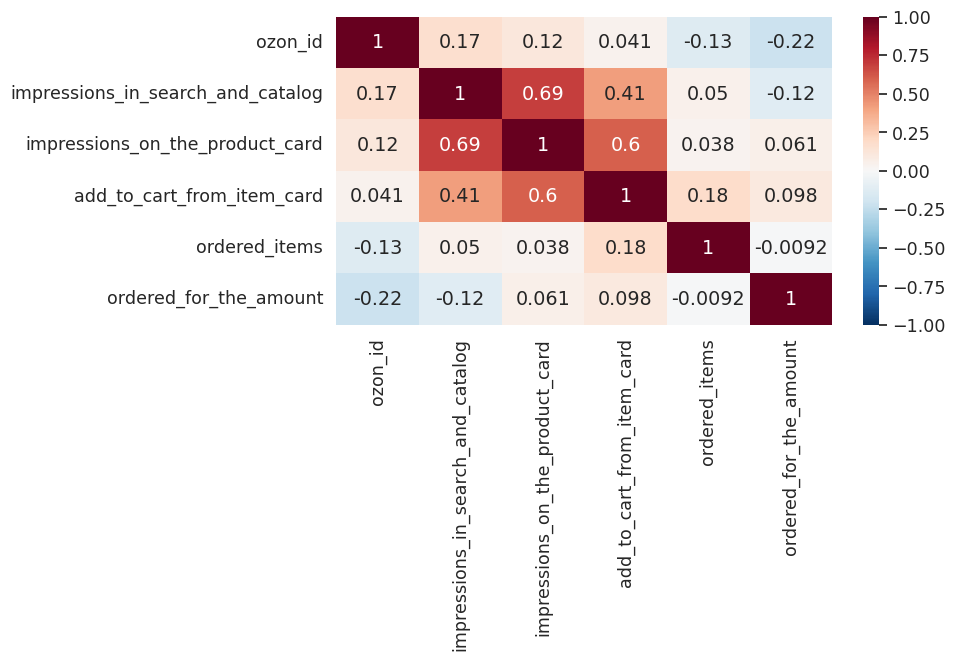

In [ ]:
sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(
    df_top_100.corr(),
    cmap='RdBu_r', # задаёт цветовую схему
    annot=True, # рисует значения внутри ячеек
    vmin=-1, vmax=1)

In [ ]:
df_top_100.describe()

## Объединение датафреймов

https://docs.google.com/spreadsheets/d/1TArTGoTTFKp_ER_lVIfSfK1MTamQhSn6/edit?usp=sharing&ouid=105740097100282595367&rtpof=true&sd=true

In [ ]:
!gdown --id  1TArTGoTTFKp_ER_lVIfSfK1MTamQhSn6

In [ ]:
df_after = pd.read_excel('/content/13 to 19.xlsx')

In [ ]:
df_after.head()

In [ ]:
df_after.columns = ['Products', 'Model', 'Ozon ID', 'Article', 'Day',
       'Impressions in search and catalog', 'Impressions on the product card',
       'Add to cart from item card', 'Ordered items',
       'Ordered for the amount']

In [ ]:
df_after.columns = df_after.columns.str.replace(' ','_').str.lower()

In [ ]:
union_names = df_top_100['ozon_id'].to_list()

In [ ]:
union_names

In [ ]:
df_200 = df.sort_values('ordered_items', ascending = False).iloc[:200]

In [ ]:
df_200.head()

,products,model,ozon_id,article,day,impressions_in_search_and_catalog,impressions_on_the_product_card,add_to_cart_from_item_card,ordered_items,ordered_for_the_amount,convers_to_card,convers_to_add
142704,"Болт колесный 1 шт для Mercedes CL (216), CLS ...","Болт колесный 1 шт для Mercedes CL (216), CLS ...",600991634,STELLOX7901914SX,2023-06-02,13,3,1,20,8000,0.230769,0.333333
428559,"Клипса пластиковая Masuma, KJ-1463","Клипса пластиковая Masuma, KJ-1463",748074398,MASUMAKJ1463,2023-06-02,2,0,0,10,1000,0.000000,NaN
475400,Клипса автомобильная Tatsumi артикул TJB1175,Клипса автомобильная Tatsumi артикул TJB1175,768001904,TATSUMITJB1175,2023-06-12,7,2,4,10,900,0.285714,2.000000
475464,Клипса автомобильная Tatsumi артикул TJB1184,Клипса автомобильная Tatsumi артикул TJB1184,768001921,TATSUMITJB1184,2023-06-04,2,3,0,10,900,1.500000,0.000000
85040,"Гайка пластмассовая аналог VAG WHT000713, P37-...","Гайка пластмассовая аналог VAG WHT000713, P37-...",567306444,PATRONP371450,2023-05-29,30,7,2,10,900,0.233333,0.285714


In [ ]:
df_200['convers_to_card'].replace([np.inf, -np.inf], np.nan, inplace=True)
df_200['convers_to_card'].fillna(0, inplace=True)
df_200['convers_to_add'].replace([np.inf, -np.inf], np.nan, inplace=True)
df_200['convers_to_add'].fillna(0, inplace=True)

In [ ]:
df_200.isna().mean()

products                             0.00
model                                0.01
ozon_id                              0.00
article                              0.00
day                                  0.00
impressions_in_search_and_catalog    0.00
impressions_on_the_product_card      0.00
add_to_cart_from_item_card           0.00
ordered_items                        0.00
ordered_for_the_amount               0.00
convers_to_card                      0.00
convers_to_add                       0.00
dtype: float64

In [ ]:
len(df_200['model'])

200

<Axes: >

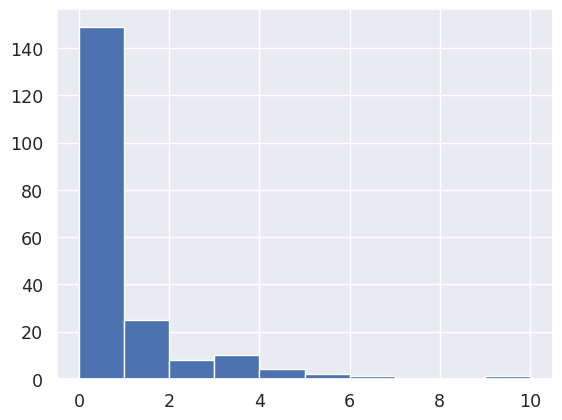

In [ ]:
df_200['convers_to_card'].hist()

In [ ]:
boxplot(df_200['convers_to_card'])

NameError: ignored

<Axes: >

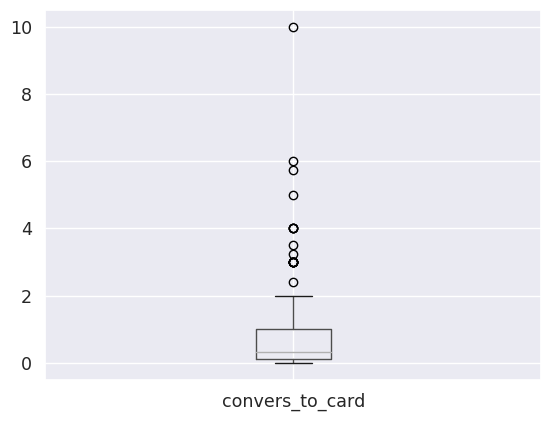

In [ ]:
df_200.boxplot(column=['convers_to_card'])

<Axes: xlabel='day'>

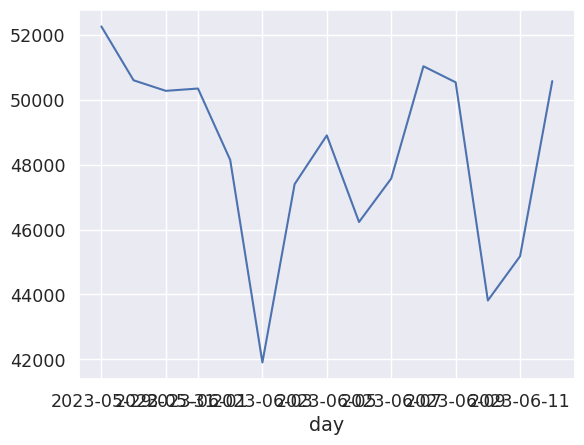

In [ ]:
df.groupby('day')['model'].nunique().plot()

# A/B test

H0 - выборочные средние равны
H1 - выборочные средние разные

В качестве исследуемой метрики возьмем "Количество заказов"
Раздедим тест на несколько частей:
 - прогнозирование временного ряда (используем спрогнозируемые данные как контрольную группу)
 - получаем данные за период, обозначаем их как тестовые данные
 - проводим тест
 - анализ результатов